# Data analysis example

This notebook gives an example of usage for `detanalysis`.

We will be using a processed file 'features.hdf5' with 1000 events
(UCB R20 using CPDv21Ge and 2 IrPt TESs)

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import astropy
import vaex as vx
from matplotlib import pyplot as plt
from detanalysis import Analyzer

import warnings
warnings.filterwarnings('ignore')

### Instantiate analyzer

In [2]:
# instantiate analyzer with file name or group directory, or list of 
# files/directories
# specific series name(s) can be used

# For old data saved with pandas add 'load_from_pandas=True' argument
# However, in that case, the entire dataframe is loaded into memory so
# best is for smaller data samples

# An analysis git repository with "cuts" and "features" subdirectories 
# can be specified (or later with function "set_analysis_repo"). 
# Available cuts/features are automatically loaded. IF cuts/features are not 
# in repository, they can be loaded directly with "load_cuts 
# or load_derived_features" (argument directory or file (s))

myanalyzer = Analyzer('features.hdf5', series=None,
                       analysis_repo='../')

#function "add_files" can bre used afterwards if needed

# show number of events 
myanalyzer.describe()

Number of files: 1
Number of events: 1000
Number of features: 50
Is DataFrame filtered? False
Cuts:
{'cut_chi2_CPDv21Ge': {'authors': 'A. Person, B. OtherPerson',
                       'contact': 'a.person@gmail.com (A. Person)',
                       'date': '2/21/2023',
                       'description': 'A low chi2 cut for demo',
                       'git_repo_branch': 'feature/cut_scripts',
                       'git_repo_name': 'detanalysis',
                       'git_repo_tag': 'v0.1.0-dirty',
                       'version': 1.3}}
Derived features:
{'slope_CPDv21Ge': {'authors': 'A. Person',
                    'contact': 'a.person@gmail.com (A. Person)',
                    'date': '2/21/2023',
                    'description': 'Simple slope CPDv21Ge',
                    'git_repo_branch': 'feature/cut_scripts',
                    'git_repo_name': 'detanalysis',
                    'git_repo_tag': 'v0.1.0-dirty',
                    'version': 1.3}}


### Display name of  the first 10 features

In [3]:
pprint(myanalyzer.feature_names[0:10])

['amp_of1x1_constrained_CPDv21Ge',
 'amp_of1x1_constrained_TotIrPt',
 'amp_of1x1_nodelay_CPDv21Ge',
 'amp_of1x1_nodelay_TotIrPt',
 'amp_of1x1_unconstrained_TotIrPt',
 'amp_of1x1_unconstrained_glitch_CPDv21Ge',
 'baseline_CPDv21Ge',
 'baseline_end_CPDv21Ge',
 'baseline_start_CPDv21Ge',
 'chi2_of1x1_constrained_CPDv21Ge']


### Access dataframe directly and display a snapshot

In [4]:
myanalyzer.df

#,amp_of1x1_constrained_CPDv21Ge,amp_of1x1_constrained_TotIrPt,amp_of1x1_nodelay_CPDv21Ge,amp_of1x1_nodelay_TotIrPt,amp_of1x1_unconstrained_TotIrPt,amp_of1x1_unconstrained_glitch_CPDv21Ge,baseline_CPDv21Ge,baseline_end_CPDv21Ge,baseline_start_CPDv21Ge,chi2_of1x1_constrained_CPDv21Ge,chi2_of1x1_constrained_TotIrPt,chi2_of1x1_nodelay_CPDv21Ge,chi2_of1x1_nodelay_TotIrPt,chi2_of1x1_unconstrained_TotIrPt,chi2_of1x1_unconstrained_glitch_CPDv21Ge,dump_number,energyabsorbed_CPDv21Ge,event_id,event_index,event_number,event_time,group_name,integral_CPDv21Ge,lowchi2_of1x1_constrained_CPDv21Ge,lowchi2_of1x1_constrained_TotIrPt,lowchi2_of1x1_nodelay_CPDv21Ge,lowchi2_of1x1_nodelay_TotIrPt,lowchi2_of1x1_unconstrained_TotIrPt,lowchi2_of1x1_unconstrained_glitch_CPDv21Ge,maximum_CPDv21Ge,minimum_CPDv21Ge,minmax_CPDv21Ge,output_gain_CPDv21Ge,output_gain_IrPtTESBig,output_gain_IrPtTESSmall,processing_id,run_type,series_number,t0_of1x1_constrained_CPDv21Ge,t0_of1x1_constrained_TotIrPt,t0_of1x1_unconstrained_TotIrPt,t0_of1x1_unconstrained_glitch_CPDv21Ge,tes_bias_CPDv21Ge,tes_bias_IrPtTESBig,tes_bias_IrPtTESSmall,trigger_amplitude,trigger_time,trigger_type,index,slope_CPDv21Ge
0,3.5182642055045533e-06,-2.9244104137365566e-09,2.210982608209535e-06,-1.0904775793189565e-09,-3.88550378885498e-09,3.5182642055045533e-06,-2.945654753288997e-06,-2.9421897518920893e-06,-2.9447831361389163e-06,708302.1181367544,69924.66187496424,1322490.4964893595,69935.18010723134,69915.31227303206,708302.1181367544,1.0,-4.588250493036704e-16,1.0,1.0,100001.0,1663111114.0717633,threshtrig_Co_12hr_I2_D20220915_T224645,-2.419582914352417e-09,414097.7266421583,846.6069545477808,1261073.6282013194,856.5956023262625,845.1954429416386,414097.7266421583,-6.78998327255249e-07,-3.0076644897460936e-06,2.3286661624908447e-06,50.0,50.0,50.0,testproc,1.0,220220915230112.0,5.68e-05,0.0001096,0.0033856,5.68e-05,0.0001796092796092796,0.00024993894993894993,7.020757020757026e-05,1.6300676882950196e-06,1663111114.0717633,4.0,0,2.5933842468270077e-09
1,1.3687810825450323e-05,-4.992371459575647e-09,1.143868350527285e-05,-4.907318108478117e-09,-4.992371459575647e-09,1.3687810825450323e-05,-2.948199606200348e-06,-2.8932658584594725e-06,-2.948280583343506e-06,58505037.34529534,68811.92943957698,63139302.25272119,68813.13225476301,68811.92943957698,58505037.34529534,1.0,-4.6619122348839535e-15,2.0,2.0,100002.0,1663111114.1521497,threshtrig_Co_12hr_I2_D20220915_T224645,5.473970108699799e-10,44307889.00303944,936.4457121306464,62644967.90050019,935.5382696813526,936.4457121306464,44307889.00303944,4.201355743408203e-06,-2.995163536071777e-06,7.19651927947998e-06,50.0,50.0,50.0,testproc,1.0,220220915230112.0,0.0002384,-2.4e-06,-2.4e-06,0.0002384,0.0001796092796092796,0.00024993894993894993,7.020757020757026e-05,9.166659584484564e-06,1663111114.1521497,4.0,1,5.501472488403341e-08
2,1.0330017073620737e-05,-5.211816825747888e-09,7.336727691948412e-06,-2.074571346642366e-09,-5.211816825747888e-09,1.0330017073620737e-05,-2.944638012250123e-06,-2.9218699011230467e-06,-2.9445459196472163e-06,13266725.27870958,66602.39269045675,17603233.307546113,66635.04746600027,66602.39269045675,13266725.27870958,1.0,-2.133581097692982e-15,3.0,3.0,100003.0,1663111114.265816,threshtrig_Co_12hr_I2_D20220915_T224645,-9.290143962101639e-10,9305707.689234914,848.5336375019292,17403792.466302987,876.9913060657886,848.5336375019292,9305707.689234914,2.8822580337524414e-06,-2.985662841796875e-06,5.867920875549316e-06,50.0,50.0,50.0,testproc,1.0,220220915230112.0,9.12e-05,2.64e-05,2.64e-05,9.12e-05,0.0001796092796092796,0.00024993894993894993,7.020757020757026e-05,5.7621204597352035e-06,1663111114.265816,4.0,2,2.267601852416966e-08
3,8.779229913003597e-06,-3.0378592564576984e-09,5.848982576362556e-06,-2.961492300949333e-09,4.0915035685722786e-09,8.779229913003597e-06,-2.9385437479866107e-06,-2.926738249359131e-06,-2.937454216156006e-06,5944841.138741695,68726.20279156175,9459882.624783825,68726.85727051631,68715.47202762333,594484

### Examples of getting features and calculating mean/std

df.x or df['x'], with x a feature, return a 'vaex expression', 
data is not loaded into memory yet and 
compution such as df.x + df.y is not done until needed


Let's use for example the feature  'amp_of1x1_constrained_CPDv21Ge'


In [5]:
# Vaex expression: 
# 
# myanalyzer.df['amp_of1x1_constrained_CPDv21Ge']
# or equivalently myanalyzer.df.amp_of1x1_constrained_CPDv21Ge
# 

# Let's print mean and std 
# (other statistics are available such  minmax, correlation, etc.)\
# see for example tutorial: https://vaex.io/docs/tutorial.html#Statistics-on-N-d-grids)

print('Mean = ' + str(myanalyzer.df.amp_of1x1_constrained_CPDv21Ge.mean()))
print('Std = ' + str(myanalyzer.df['amp_of1x1_constrained_CPDv21Ge'].std()))

      
# accessing numpy array (first 10 elements) using analyzer's 
# get_values (wrapper to vaex 'evaluate')
print('\nNumpy array:')
print(myanalyzer.get_values('amp_of1x1_constrained_CPDv21Ge',cut=None)[0:10])


Mean = 8.940265675273994e-06
Std = 4.079931050597307e-06

Numpy array:
[3.51826421e-06 1.36878108e-05 1.03300171e-05 8.77922991e-06
 6.85861346e-07 1.18536399e-05 1.21726879e-05 1.18682281e-05
 6.48835429e-06 1.14345832e-05]


### Apply and save cuts

In [6]:
# cuts can be applied in a similar way than pandas dataframe
# for example:

cut = myanalyzer.df.event_index<10
mean_amp_of1x1 = myanalyzer.df[cut].amp_of1x1_constrained_CPDv21Ge
print('Mean after cut = ' + str(mean_amp_of1x1))

# Register/save cuts
myanalyzer.register_cut(cut, 'mycut1')
myanalyzer.register_cut('event_index>200', 'mycut2')


# default when registering a cut if to replace previous cut with same
# name, but other operator can be used: and/or/xor/subtract
print('\nReplace cut vs other operators:')
print('Number of events after "mycut2" cut = ' 
      + str(myanalyzer.df.filter('mycut2').count()))

myanalyzer.register_cut('event_index<10', 'mycut2', mode='or', overwrite=True)
# -> mycut2 = event_index>200 or event_index<10

print('Number of events after updated "mycut2" cut = ' 
      + str(myanalyzer.df.filter('mycut2').count()))

# get values after cut:
print('\nNumpy array after cut:')
print(myanalyzer.get_values('amp_of1x1_constrained_CPDv21Ge', cut='mycut1'))


Mean after cut = amp_of1x1_constrained_CPDv21Ge

Replace cut vs other operators:
Number of events after "mycut2" cut = 800
Number of events after updated "mycut2" cut = 809

Numpy array after cut:
[3.51826421e-06 1.36878108e-05 1.03300171e-05 8.77922991e-06
 6.85861346e-07 1.18536399e-05 1.21726879e-05 1.18682281e-05
 6.48835429e-06]


### Apply global filter

In [7]:
# a global filter can be applied to dataframe
# argument can be cut name or vaex expression
print('\n\nApply global filter\n')
myanalyzer.apply_global_filter('mycut1')
myanalyzer.describe()

print('\nMean (filtered dataframe) = ' 
      + str(myanalyzer.df['amp_of1x1_constrained_CPDv21Ge'].mean()))

# default is to replace previous filter but other operator 
# can be used and/or/xor/subtract
print('\nReplace cut vs other operators:')
myanalyzer.apply_global_filter('event_index>900', mode='or')


# filter can be dropped completely
print('\n\nDrop global filter\n')
myanalyzer.drop_global_filter()
myanalyzer.describe()



Apply global filter

Filter applied!
Number of events after filter: 9 (0.9%)
Number of files: 1
Number of events: 9
Number of features: 50
Is DataFrame filtered? True
Cuts:
{'cut_chi2_CPDv21Ge': {'authors': 'A. Person, B. OtherPerson',
                       'contact': 'a.person@gmail.com (A. Person)',
                       'date': '2/21/2023',
                       'description': 'A low chi2 cut for demo',
                       'git_repo_branch': 'feature/cut_scripts',
                       'git_repo_name': 'detanalysis',
                       'git_repo_tag': 'v0.1.0-dirty',
                       'version': 1.3},
 'mycut1': {},
 'mycut2': {}}
Derived features:
{'slope_CPDv21Ge': {'authors': 'A. Person',
                    'contact': 'a.person@gmail.com (A. Person)',
                    'date': '2/21/2023',
                    'description': 'Simple slope CPDv21Ge',
                    'git_repo_branch': 'feature/cut_scripts',
                    'git_repo_name': 'detanalysis'

### Adding or loading new features

A feature can be defined interactively or with a feature script (recommended)
In both cases, a new feature is vaex "virtual column", columns that are backed by a (lazy) computation

Example of feature script: see "demos/features/slope_CPDv21Ge.py"

A feature script can be loaded by either setting git repository or if not within a git repository, specify directory or file name:

 * myanalyzer.set_analysis_repo('path/to/repo', load_func=True)
 * or myanalyzer.load_derived_features('path/to/feature/dir/file.py')



In [8]:
#  Example of adding a feature interactively

# let's add a feature called... "new_feature" 
myanalyzer.add_feature(myanalyzer.df.amp_of1x1_constrained_CPDv21Ge*1e6, 'new_feature')

# this is equivalent to:
# myanalyzer.df['new_feature'] = myanalyzer.df.amp_of1x1_constrained_CPDv21Ge*1e6

# mean of new feature:
print('Mean "new_feature" = ' 
      + str(myanalyzer.df.new_feature.mean()))


# derived feature script (already loaded)
print('Mean "slope" = ' 
      + str(myanalyzer.df.slope_CPDv21Ge.mean()))

Mean "new_feature" = 8.940265675273992
Mean "slope" = 1.768689722211657e-08


### Histograms

Display histograms using analyzer "hist" function

It can be combined with already produced figure using matplotlib

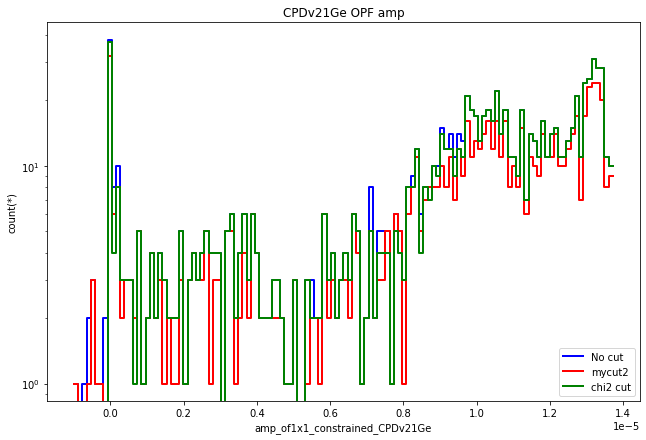

In [9]:
# let's display histogram without cut, mycut2, and cut_chi2_CPDv21Ge
# see functions for more arguments
fig, ax = myanalyzer.hist('amp_of1x1_constrained_CPDv21Ge',
                          cuts=[None, 'mycut2','cut_chi2_CPDv21Ge'],
                          shape=128, title='CPDv21Ge OPF amp',
                          labels=['No cut','mycut2', 'chi2 cut'])

###  Heatmap plot

Display heatmap using analyzer "heatmap" function.

It can be combined with already produced figure using matplotlib

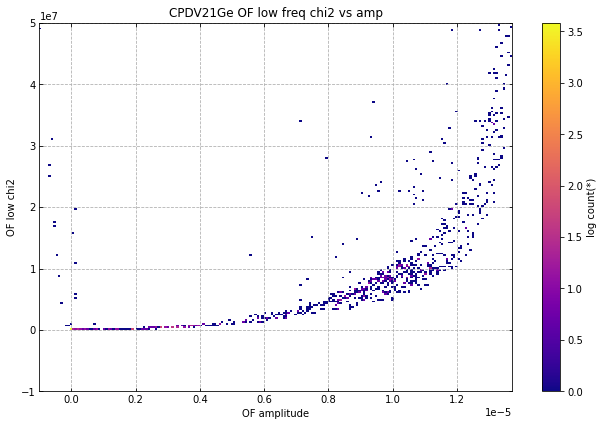

In [10]:
# example heatmap chi2 vs amp
fig,ax  = myanalyzer.heatmap('amp_of1x1_constrained_CPDv21Ge',
                             'lowchi2_of1x1_constrained_CPDv21Ge',
                             ylimits = [-0.1e8, 0.5e8],
                             shape=200,
                             xlabel='OF amplitude', ylabel='OF low chi2',
                             title='CPDV21Ge OF low freq chi2 vs amp')

###  scatter plot

Display scatter using analyzer "scatter" function.

It can be combined with already produced figure using matplotlib

**IMPORTANT NOTE**: matplolib scatter is slow and not suitable for very large samples. 
For large number of events, either use "heatmap" or randomly downsample 
(before cuts) using "nb_random_samples" argument. There is a default limit of 50000 events, 
use "length_check=False" to disable...

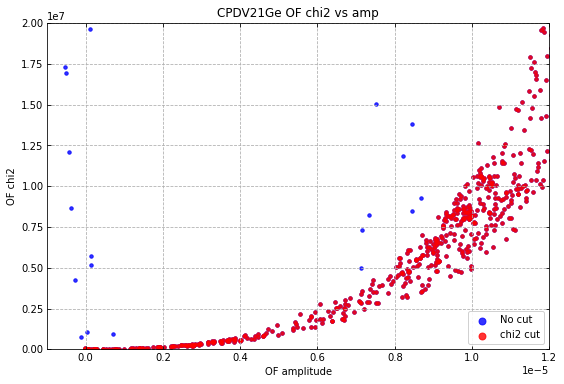

In [11]:

# vizualize chi2 vs amp before and after cut 
# as an example, downsample to 800 events (before cuts)
#cuts = [None, 'cut_chi2_CPDv21Ge'],
fig, ax = myanalyzer.scatter('amp_of1x1_constrained_CPDv21Ge',
                             'lowchi2_of1x1_constrained_CPDv21Ge',
                             cuts = [None,'cut_chi2_CPDv21Ge'],
                             labels=['No cut', 'chi2 cut'],
                             xlimits = [-0.1e-5, 1.2e-5],
                             ylimits =[0, 2e7],
                             ms=12,
                             xlabel='OF amplitude', ylabel='OF chi2',
                             title='CPDV21Ge OF chi2 vs amp',
                             nb_random_samples=800)
                             

### Interactive selection

a sample of events can be selected interactively using either
 * rectangular selection
 * X-range selection
 
 
 Once selected the cut is automatically registered with name 
 "default". Events can be selected multiple times using same GUI ("default" cut replaced
 each time)


In [12]:
# interactive selection: argument a vax expression (df.x, df[cut].x, etc.) 
# or feature name

myanalyzer.interactive_selection('amp_of1x1_constrained_CPDv21Ge',
                                 'chi2_of1x1_constrained_CPDv21Ge')


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [13]:
# once selection done, cut is saved as "default"
# "default" cut is replaced anytime a new cut is defined so best is to 
# immediately rename using "register_cut"
myanalyzer.register_cut('default','mycut3')

print('OF amp values after default cut:')
print(myanalyzer.get_values('slope_CPDv21Ge', cut='mycut3'))


OF amp values after default cut:
[2.74480374e-07 2.69269607e-07 3.91091490e-07 3.37071640e-07
 2.43666976e-07 3.38032909e-07]


### Get/Plot traces (require path to raw data!)

Let's use selection above (renamed as "mycut3") and display 2 CPDv21Ge traces randomly selected after cut



(6, 1, 25000)


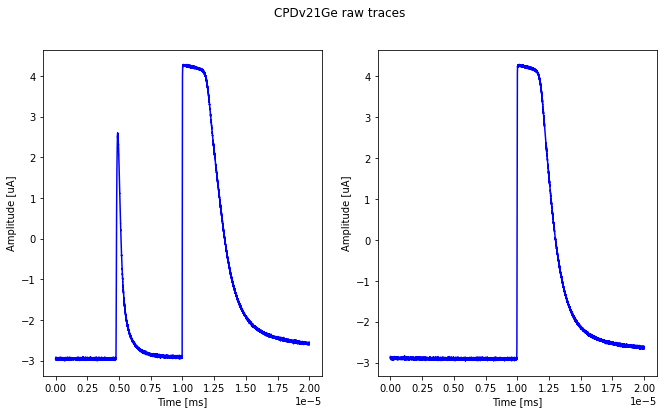

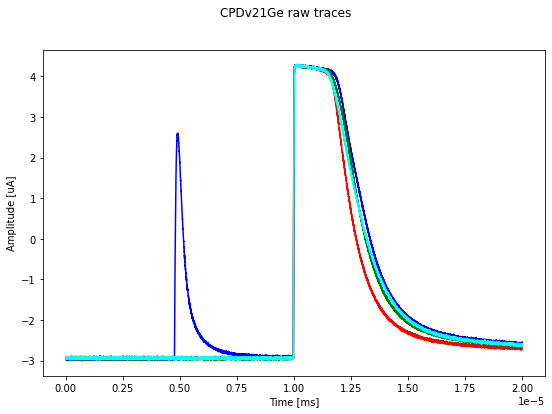

In [14]:
# get the traces using analyzer "get_traces" function (return 3D numpy array)
# there is a hard coded limit of 100 traces (can be disabled)

#
traces, info = myanalyzer.get_traces('CPDv21Ge', raw_path='/sdata1/runs/run20/processed', 
                                     cut='mycut3')

print(traces.shape)

# plot traces using analyzer "plot_traces" (single or multiple figures)

fig, ax = myanalyzer.plot_traces('CPDv21Ge', raw_path='/sdata1/runs/run20/processed',
                                 cut='mycut3',
                                 nb_random_samples=2)



# can be also single figure (let's pick 4 traces )
fig, ax = myanalyzer.plot_traces('CPDv21Ge', raw_path='/sdata1/runs/run20/processed',
                                 single_plot=True,
                                 cut='mycut3',
                                 nb_random_samples=4)
